<a href="https://colab.research.google.com/github/bhoomikaagrawal16/Compute-tasks/blob/main/Task%206/Boosting_task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boosting task

Make a copy of this colab file and follow the instructions to complete the task. You are expected to complete the entire task and it would be appreciated if you did more than what is aksed from you.


ALL THE BEST!

Importing necessary libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
colour = sns.color_palette()

Reading and converting data into a date-time format

In [2]:
df = pd.read_csv('/content/AEP_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


Plot the data:

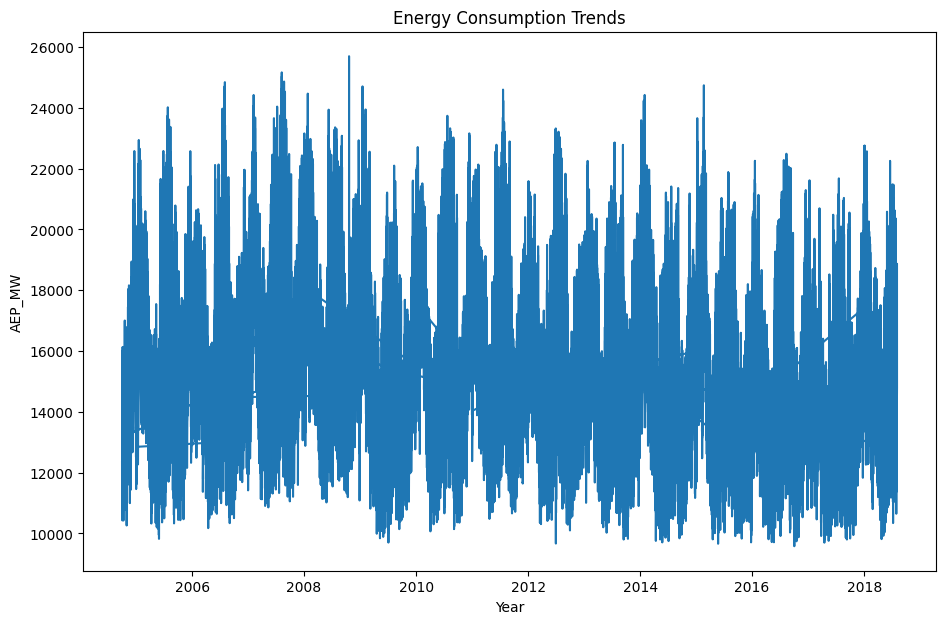

In [7]:
plt.figure(figsize=(11,7))
plt.plot(df.index, df['AEP_MW'])
plt.xlabel('Year')
plt.ylabel('AEP_MW')
plt.title('Energy Consumption Trends')
plt.show()

## Data splitting

Split the data into training and testing data, split data at 01-01-2016

In [9]:
df_train = df[df.index <= '2016-01-01']
df_test = df[df.index > '2016-01-01']


plot the train and test data

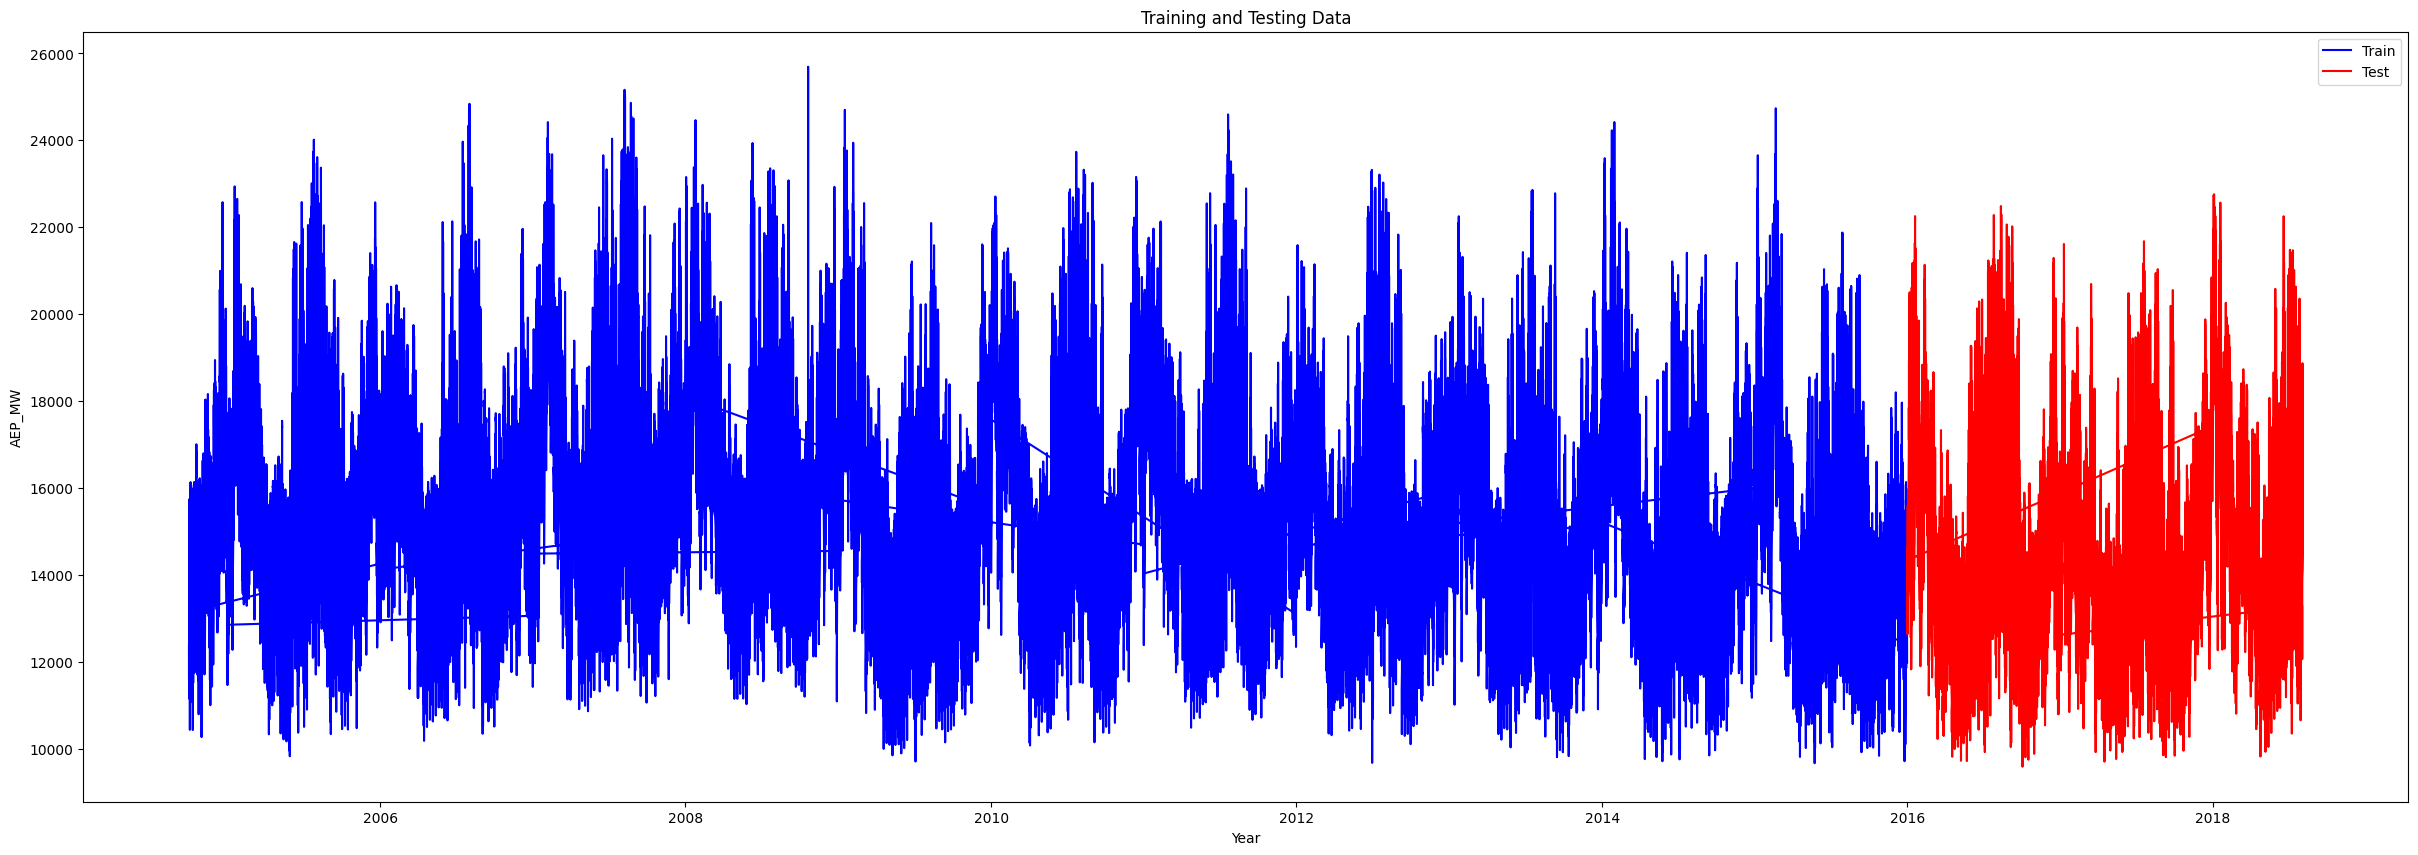

In [10]:
plt.figure(figsize=(30,10))
plt.plot(df_train.index, df_train['AEP_MW'], color='blue', label='Train')
plt.plot(df_test.index, df_test['AEP_MW'], color='red', label='Test')
plt.xlabel('Year')
plt.ylabel('AEP_MW')
plt.legend()
plt.title('Training and Testing Data')
plt.show()

Plot data for a random week AND day, to visualize weekly and daily variations in data

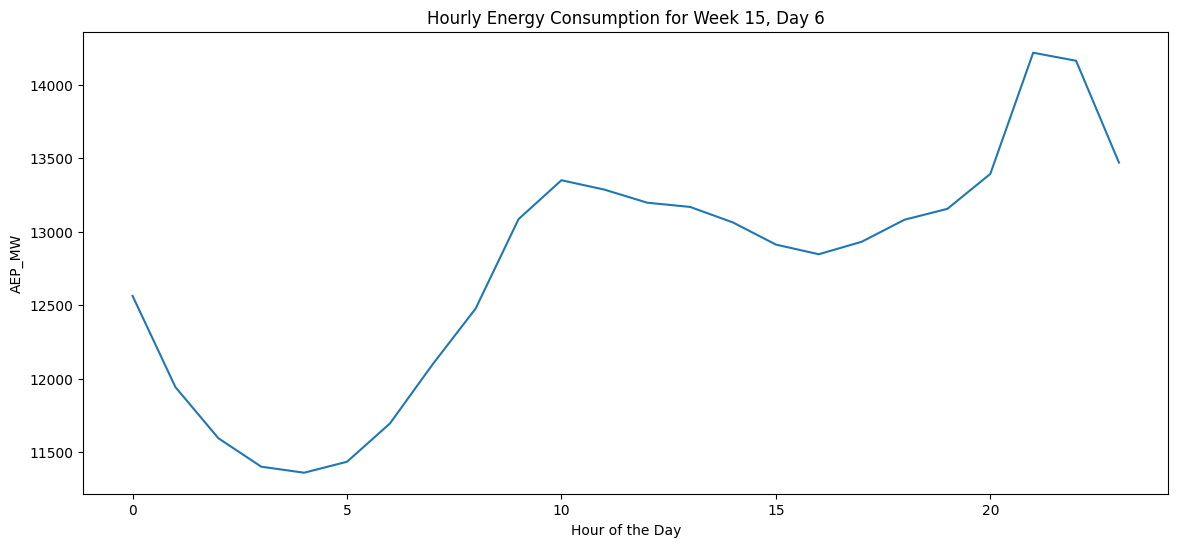

In [24]:
import random

# Select a random week and day
random_week = random.randint(1, 52)
random_day = random.randint(0, 6)

# Filter the data for the selected week and day
df_week = df_train[(df_train.index.week == random_week) & (df_train.index.dayofweek == random_day)]

# Plot the data
plt.figure(figsize=(14, 6))
sns.lineplot(x=df_week.index.hour, y='AEP_MW', data=df_week, ci=None)
plt.xlabel('Hour of the Day')
plt.ylabel('AEP_MW')
plt.title(f'Hourly Energy Consumption for Week {random_week}, Day {random_day}')
plt.show()


## Feature Creation


Create different features for: hour, day, month, year, week and append it to the data-frame

In [26]:
df_train['hour'] = df_train.index.hour
df_train['day'] = df_train.index.day
df_train['month'] = df_train.index.month
df_train['year'] = df_train.index.year
df_train['week'] = df_train.index.week

df_test['hour'] = df_test.index.hour
df_test['day'] = df_test.index.day
df_test['month'] = df_test.index.month
df_test['year'] = df_test.index.year
df_test['week'] = df_test.index.week

Make boxplots to depict energy consumption hourly and monthly.(x variable would be hour and month and y variable would be the feature 'AEP_MW'

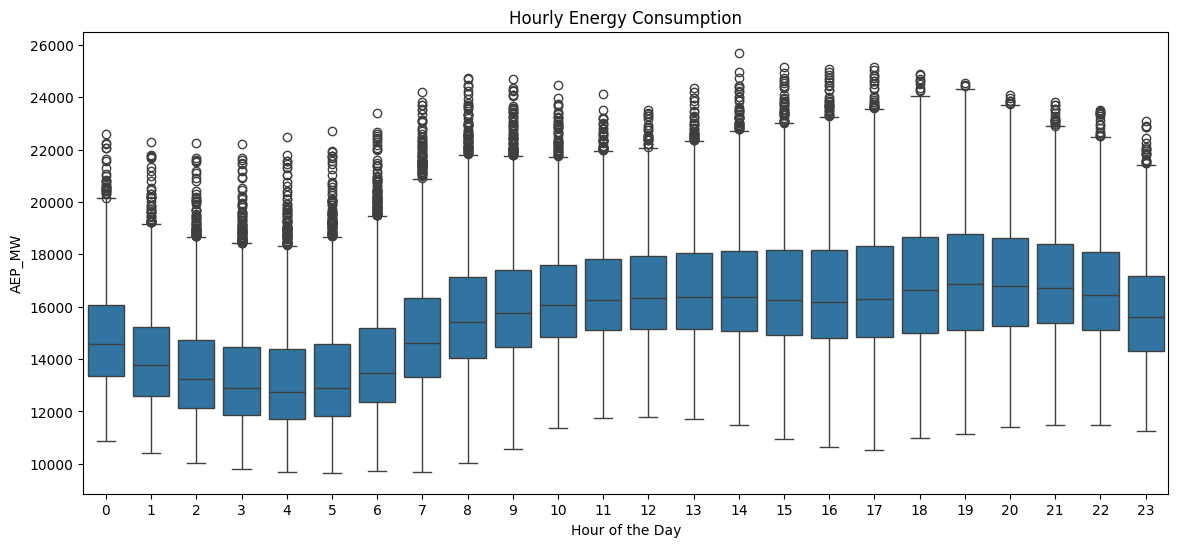

In [27]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='hour', y='AEP_MW', data=df_train)
plt.xlabel('Hour of the Day')
plt.ylabel('AEP_MW')
plt.title('Hourly Energy Consumption')
plt.show()

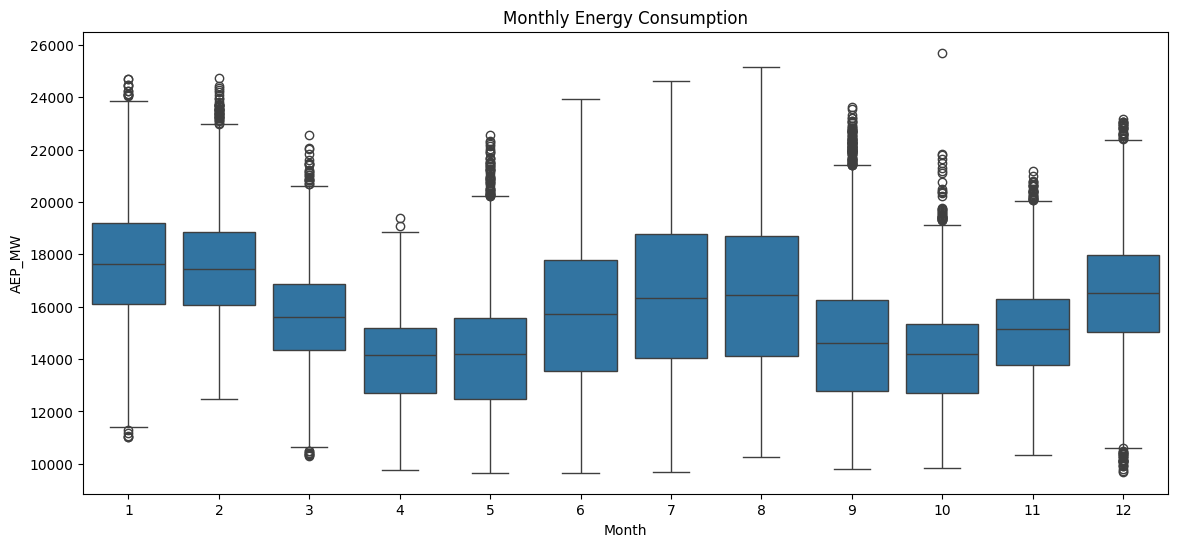

In [28]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='month', y='AEP_MW', data=df_train)
plt.xlabel('Month')
plt.ylabel('AEP_MW')
plt.title('Monthly Energy Consumption')
plt.show()

## Model Creation andEestimation

Run a regression XGBoost model on the training and testing data-set. Take 1000 estimators and learnning rate as 0.01

In [29]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=1000, learning_rate=0.01)
xg_reg.fit(df_train.drop(columns=['AEP_MW']), df_train['AEP_MW'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Predict values for the testing set using the model and plot them

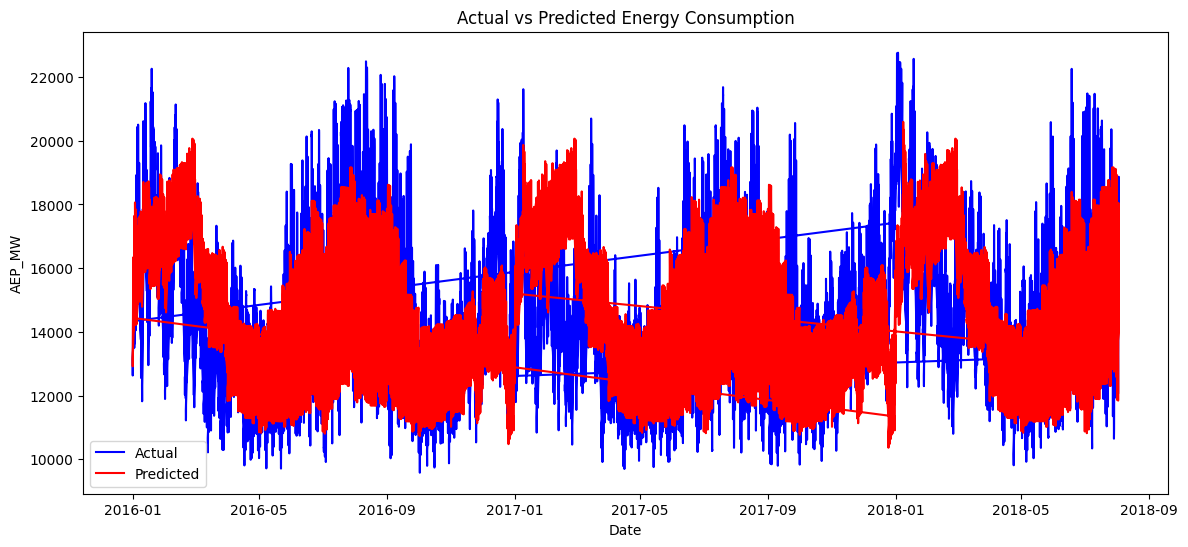

In [30]:
preds = xg_reg.predict(df_test.drop(columns=['AEP_MW']))

plt.figure(figsize=(14, 6))
plt.plot(df_test.index, df_test['AEP_MW'], label='Actual', color='blue')
plt.plot(df_test.index, preds, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('AEP_MW')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()
plt.show()

Use RMSE to find out the accuracy of your model

In [31]:
rmse = np.sqrt(mean_squared_error(df_test['AEP_MW'], preds))
print("RMSE: %f" % (rmse))

RMSE: 1921.357234


Find the importance of each feature use

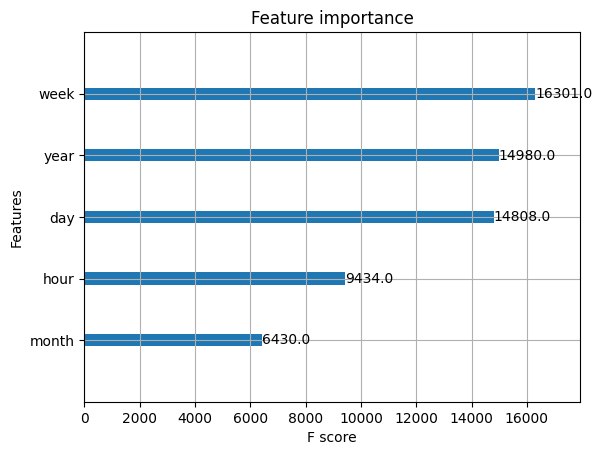

In [32]:
xgb.plot_importance(xg_reg)
plt.show()